<a href="https://colab.research.google.com/github/routb68/jan-may-2023-prml-assignment/blob/main/assignment-1/(2.3)Spectral_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question**

> *2.3  Runthespectralclusteringalgorithm(spectral relaxation of K-means using Kernel- PCA) k = 2. Choose an appropriate kernel for this data-set and plot the clusters obtained in different colors. Explain your choice of kernel based on the output you obtain.*



<ipython-input-8-f803ae7450a0>:61: ComplexWarning: Casting complex values to real discards the imaginary part
  mean[int(assign[i])]= np.add(mean[int(assign[i])],array[i])
<ipython-input-8-f803ae7450a0>:109: ComplexWarning: Casting complex values to real discards the imaginary part
  mean[int(assign[i])]=mean[int(assign[i])]+array[i]


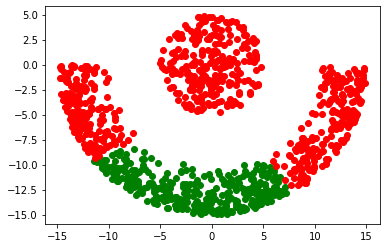

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"/content/cm_dataset_2.csv",header=None)
df.columns=('x','y')
array=df.to_numpy()
plotarray=array


# finding centered Kernal matrix

transposearray=np.transpose(array)
k=np.matmul(array, transposearray)
for i in range(1000):
    for j in range(1000):
        k[i][j]+=1
for i in range(1000):
    for j in range(1000):
        k[i][j]=k[i][j]*k[i][j]
        
I=np.identity(1000)

div=1/1000
divmat=np.full((1000,1000), div)
matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)



# Finding resultant matrix

k=2
eig_vals, eig_vecs = np.linalg.eig(kernalcent)
eig_index=eig_vals.argsort()[-k:][::-1]
top_k_eigen=[]
for i in range(k):
    top_k_eigen.append(eig_vals[eig_index[i]])
top_k_eigen_vec=[]
for i in range(k):
    top_k_eigen_vec.append(eig_vecs[:,eig_index[i]])

top_k_eigen_vec = np.array(top_k_eigen_vec)
top_k_eigen_vec=np.transpose(top_k_eigen_vec)
array=top_k_eigen_vec


# initial assignment to clusters
assign=np.zeros([1000])
import random
for i in range(1000):
    assign[i]=random.randrange(k)


# finding mean of clusters
mean=np.zeros([k,k])
count=np.zeros([k])
for i in range(1000):
    mean[int(assign[i])]= np.add(mean[int(assign[i])],array[i])
    count[int(assign[i])]+=1
for i in range(len(mean)):
    mean[i]=np.divide(mean[i], count[i])



# k-means algorithm implementation
it=0
final_error = -1
itlist=[]
errorlist=[]
while(1):
    it+=1
    itlist.append(it)
    dist=0
    error=0
    for i in range(1000):
        dist=np.linalg.norm(array[i] - mean[int(assign[i])])
        dist*=dist
        error+=dist
    errorlist.append(error)
    error_fig=plt
    if(final_error == -1):
        final_error = error
    elif(final_error > error):
        final_error = error
    else:
        break
    
    reassign=np.zeros(1000)
    dist_arr=[0]*k
    for i in range(1000):
        for j in range(k):
            dist_arr[j]=np.linalg.norm(array[i] - mean[j])
            dist_arr[j]*=dist_arr[j]
        minpos=dist_arr.index(min(dist_arr))
        if(assign[i]==minpos):
            reassign[i]=assign[i]
        else:
            reassign[i]=minpos
    assign=reassign
    mean=np.zeros([k,k])
    count=np.zeros([k])  
    for i in range(1000):
        mean[int(assign[i])]=mean[int(assign[i])]+array[i]
        count[int(assign[i])]+=1

    for i in range(len(mean)):
        mean[i]=np.divide(mean[i], count[i])



colour=['red','green','blue','orange','yellow']
for i in range(1000):
    plt.scatter(plotarray[i][0], plotarray[i][1], c = colour[int(assign[i])])
plt.show()
